In [17]:
import seaborn as sns
import parselmouth
import matplotlib.pyplot as plt
import numpy as np
import scipy.io.wavfile as wavfile
#código pegado em https://parselmouth.readthedocs.io/en/latest/examples/plotting.html 
#e adaptado para cortar o arquivo (CAI_LE.wav) para uma amostra de 0.5s

In [3]:
sns.set()
plt.rcParams['figure.dpi'] = 100

In [18]:
sampleRate, f = wavfile.read("CAI_LE.wav")
f = f[:len(f)//102]
wavfile.write("tmp.wav", sampleRate, f)

In [21]:
snd = parselmouth.Sound("tmp.wav")
print(snd)

Object type: Sound
Object name: <no name>
Date: Wed Apr 17 16:28:05 2019

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 0.493015873015873 seconds
   Total duration: 0.493015873015873 seconds
Time sampling:
   Number of samples: 10871
   Sampling period: 4.5351473922902495e-05 seconds
   Sampling frequency: 22050 Hz
   First sample centred at: 2.2675736961451248e-05 seconds
Amplitude:
   Minimum: -0.764251709 Pascal
   Maximum: 0.797729492 Pascal
   Mean: -0.000248828727 Pascal
   Root-mean-square: 0.187486134 Pascal
Total energy: 0.0173300258 Pascal² sec (energy in air: 4.33250646e-05 Joule/m²)
Mean power (intensity) in air: 8.78776262e-05 Watt/m² = 79.44 dB
Standard deviation in channel 1: 0.187494593 Pascal



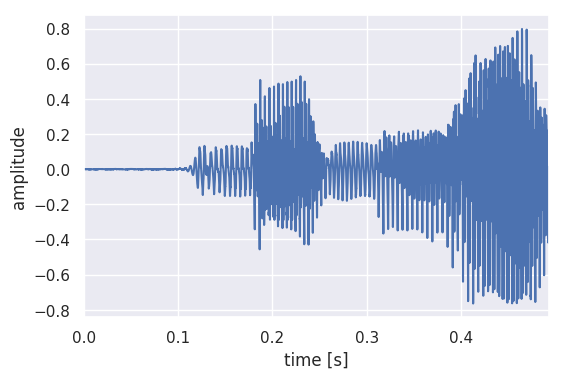

In [22]:
plt.figure()
plt.plot(snd.xs(), snd.values.T)
plt.xlim([snd.xmin, snd.xmax])
plt.xlabel("time [s]")
plt.ylabel("amplitude")
plt.show() # or plt.savefig("sound.png"), or plt.savefig("sound.pdf")

In [95]:
def draw_spectrogram(spectrogram, dynamic_range=70):
    """
    X -> array de Tempo
    Y -> array de Frequencia
    sg_db -> Intensidade de cada frequência y no tempo x
    """
    
    X, Y = spectrogram.x_grid(), spectrogram.y_grid() 
    sg_db = 10 * np.log10(spectrogram.values)
    plt.pcolormesh(X, Y, sg_db, vmin=sg_db.max() - dynamic_range )
    plt.ylim([spectrogram.ymin, spectrogram.ymax])
    plt.xlabel("time [s]")
    plt.ylabel("frequency [Hz]")
    

def draw_intensity(intensity):
    plt.plot(intensity.xs(), intensity.values.T, linewidth=3, color='w')
    plt.plot(intensity.xs(), intensity.values.T, linewidth=1)
    plt.grid(False)
    plt.ylim(0)
    plt.ylabel("intensity [dB]")

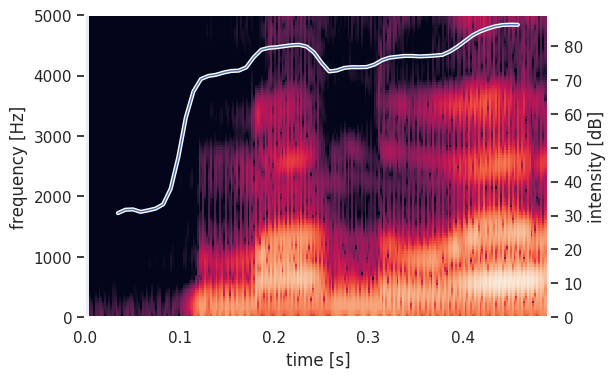

In [96]:
intensity = snd.to_intensity()
spectrogram = snd.to_spectrogram()
plt.figure()
draw_spectrogram(spectrogram)
plt.twinx()
draw_intensity(intensity)
plt.xlim([snd.xmin, snd.xmax])
plt.show()